## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [589]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline
df=pd.read_csv("students-data.csv",";")
df5=df   # for keeping the orginal values, without any changes (to be used while plotting)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [591]:
df.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


In [592]:
df.sum().isnull()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [593]:
df2=df.select_dtypes(include="object",exclude="int")
df2.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [594]:
df3=df.select_dtypes(exclude="object")

In [595]:
df3.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [596]:
df=df.drop(labels=['traveltime','studytime','failures','famrel','freetime','Dalc'],axis=1)
#manually removed the columns to understand the workings

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [597]:
# trying a different approach for encoding
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [598]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [599]:
df4=df[['G1','G2','G3']]
#tried a different method below to update values.

In [600]:
for col in df4:
    for i, row_value in df4[col].iteritems():
        if df4[col][i] > 9:
            df[col][i]=1
        else:
            df[col][i]=0        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [601]:
#Method used above is resource consuming, it wont be a preffered method hence forth
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1
9,0,1,15,1,0,1,3,4,2,2,...,1,1,0,1,1,5,0,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [602]:
x=df.drop('G3',axis=1)
y=df['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

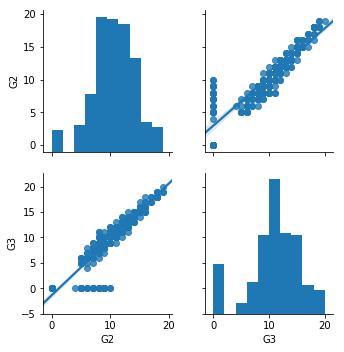

In [603]:
sns.pairplot(df5[["G2",'G3']],kind="reg")


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

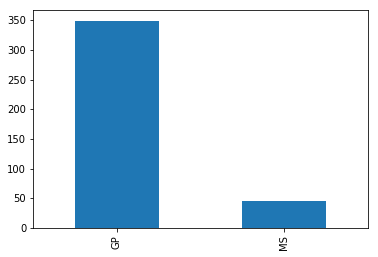

In [604]:
df5['school'].value_counts().plot.bar()

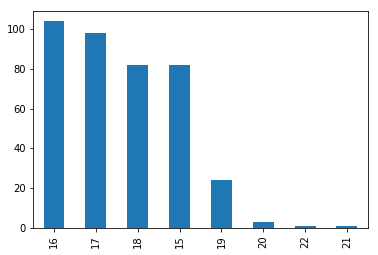

In [605]:
df5['age'].value_counts().head(10).plot.bar()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [606]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
test_size = 95/395
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

In [607]:
x_train.count()

school        300
sex           300
age           300
address       300
famsize       300
Pstatus       300
Medu          300
Fedu          300
Mjob          300
Fjob          300
reason        300
guardian      300
schoolsup     300
famsup        300
paid          300
activities    300
nursery       300
higher        300
internet      300
romantic      300
goout         300
Walc          300
health        300
absences      300
G1            300
G2            300
dtype: int64

In [608]:
x_test.count()

school        95
sex           95
age           95
address       95
famsize       95
Pstatus       95
Medu          95
Fedu          95
Mjob          95
Fjob          95
reason        95
guardian      95
schoolsup     95
famsup        95
paid          95
activities    95
nursery       95
higher        95
internet      95
romantic      95
goout         95
Walc          95
health        95
absences      95
G1            95
G2            95
dtype: int64

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [609]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc

In [610]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_train)
model_score = model.score(x_train, y_train)
print("The accuracy score for Train data = ",model_score)
trainF1score = f1_score(y_train,y_predict)
print("The F1 score for Train data = ",trainF1score)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print("The accuracy score for Test data = ",model_score)
testF1score = f1_score(y_test,y_predict)
print("The F1 score for Train data = ",testF1score)

The accuracy score for Train data =  0.9133333333333333
The F1 score for Train data =  0.9322916666666666
The accuracy score for Test data =  0.9368421052631579
The F1 score for Train data =  0.955223880597015


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [611]:
metrics.confusion_matrix(y_predict, y_test)

array([[25,  4],
       [ 2, 64]], dtype=int64)

In [612]:
from sklearn.metrics import roc_curve, auc
y_predictProb = model.predict_proba(x_train)
fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.9666847370755508

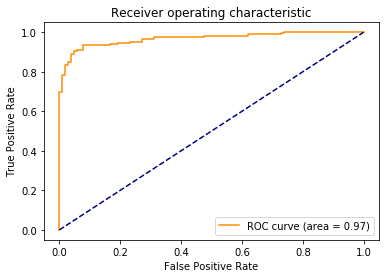

In [613]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [615]:
optimalF1 = 0
optimalTh = 0
for th in thresholds:
    preds = np.where(model.predict_proba(x_train)[:,1] > th, 1, 0)
    f1Score = f1_score(y_train, preds)
    if(optimalF1 < f1Score):
        optimalF1 = f1Score
        optimalTh = th
trainPreds = np.where(model.predict_proba(x_train)[:,1] > optimalTh, 1, 0)
trainAccuracy = accuracy_score(y_train, trainPreds)
trainRecall = recall_score(y_train, trainPreds)
trainPrecision = precision_score(y_train, trainPreds)
trainF1score = f1_score(y_train, trainPreds)
optimalTrainResults=[x_train.shape[0], optimalTh, trainAccuracy, trainRecall, trainPrecision, trainF1score]
testPreds = np.where(model.predict_proba(x_test)[:,1] > optimalTh, 1, 0)
testAccuracy = accuracy_score(y_test, testPreds)
testRecall = recall_score(y_test, testPreds)
testPrecision = precision_score(y_test, testPreds)
testF1score = f1_score(y_test, testPreds)
optimalTestResults=[x_test.shape[0], optimalTh, testAccuracy, testRecall, testPrecision, testF1score]
resultsDf = pd.DataFrame( index=["dataSize", "optimalTh", "accuracy", "recall", "precision", "f1_score"])
resultsDf['optimalTrainResults'] = optimalTrainResults
resultsDf['optimalTestResults'] = optimalTestResults
resultsDf

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,optimalTrainResults,optimalTestResults
dataSize,300.000000,95.000000
optimalTh,0.443487,0.443487
accuracy,0.926667,0.936842
recall,0.928934,0.941176
precision,0.958115,0.969697
f1_score,0.943299,0.955224


# Naive bayes with Iris data

### Import Iris.csv

In [627]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline
Ir=pd.read_csv("Iris.csv")

In [628]:
Ir.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [629]:
Ir.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [630]:
Ir.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [631]:
X=Ir.drop("Class",axis=1)
y=Ir["Class"]

### Find the distribution of target variable (Class)

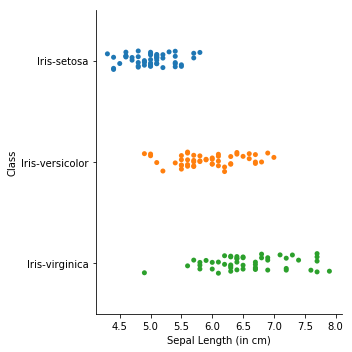

In [632]:
sns.catplot(x="Sepal Length (in cm)", y="Class", data=Ir)

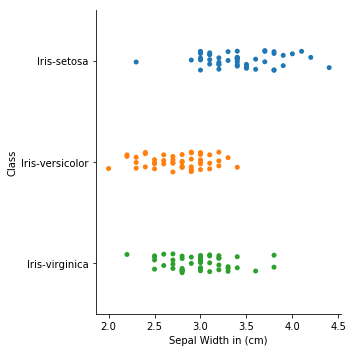

In [633]:
sns.catplot(x="Sepal Width in (cm)", y="Class", data=Ir)

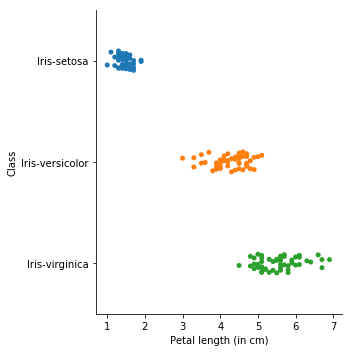

In [634]:
sns.catplot(x="Petal length (in cm)", y="Class", data=Ir)

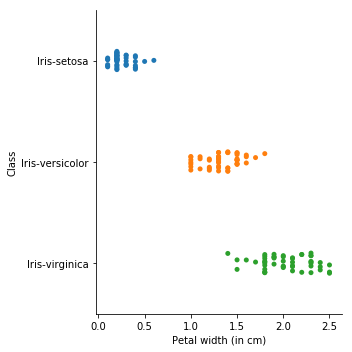

In [635]:
sns.catplot(x="Petal width (in cm)", y="Class", data=Ir)

### Plot the distribution of target variable using histogram

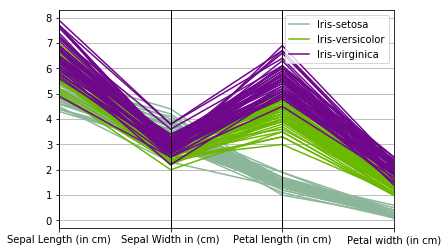

In [636]:
from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(Ir, 'Class')

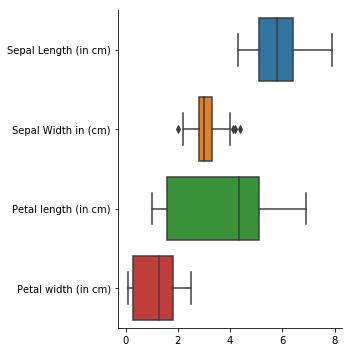

In [637]:
sns.catplot(data=Ir.drop('Class',axis=1), orient="h", kind="box")

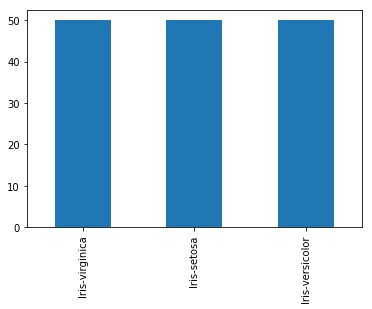

In [640]:
Ir['Class'].value_counts().plot(kind='bar')

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

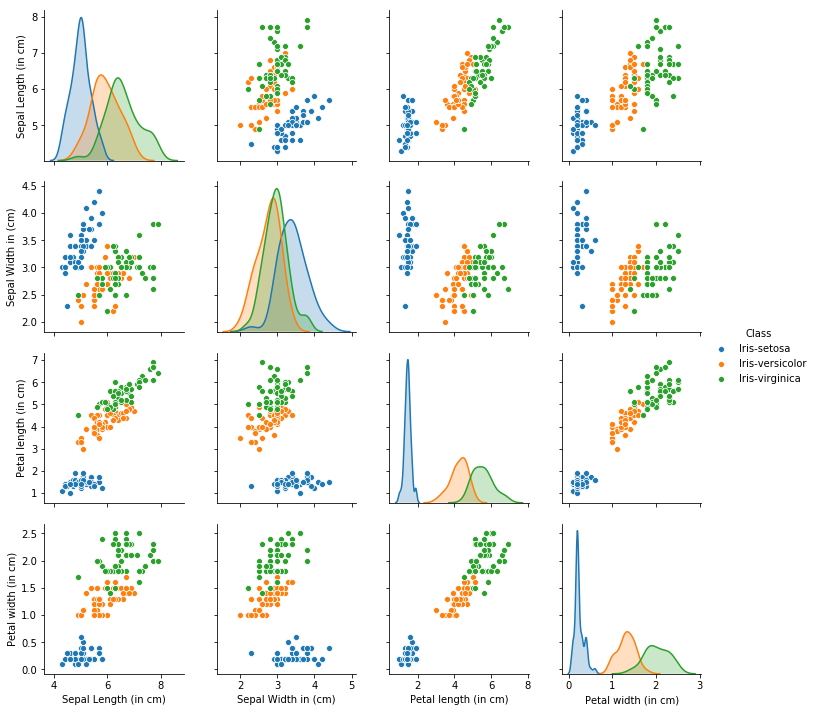

In [641]:
sns.pairplot(Ir, hue = "Class")

In [642]:
#Sepal length, Petal length and petal width have distinct distrubution for all three class
#Sepal width has close distrubtion, it will difficult to predict the class by using Sepal width

### Summary Statistics and explain insights for at least 2 variables

In [643]:
Ir.describe(include="all")

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


#Sepal width has a mean of 3.05 and median of the values lie below 3.00, the data is evenly distrubuted.
#Petal length has a standard deviation of 1.76,difference between mean and median of data also huge. Data is not distrubted evenly, will have outliers.

### Correlation among all variables and give your insights

In [644]:
Ir.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


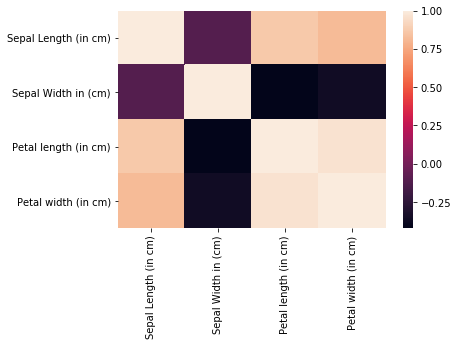

In [645]:
sns.heatmap(Ir.corr())

Insight - Sepal width has a negative correlation with other features, hence a bad feature to use for prediction.
          Sepal Length, Petal length and Petal width are highly correlated, hench a good feature to use for prediction

### Split data in Training and Validation in 80:20

In [688]:
for feature in Ir.columns:
    if Ir[feature].dtype == 'object':
        Ir[feature] = pd.Categorical(Ir[feature]).codes
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

### Do Feature Scaling

In [689]:
from scipy.stats import zscore
X=X.apply(zscore)

In [690]:
X.describe()

,Sepal Length (in cm),Petal length (in cm),Petal width (in cm)
count,1.500000e+02,1.500000e+02,1.500000e+02
mean,1.049161e-16,-2.649732e-16,1.609823e-15
std,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,3.362659e-01,1.332259e-01
75%,6.745011e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,1.786341e+00,1.710902e+00


### Train and Fit NaiveBayes Model

In [691]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [692]:
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


### Print Accuracy and Confusion Matrix and Conclude your findings

In [693]:
predicted = model.predict(X_train)
model_score = model.score(X_train,y_train)
print("The accuracy score for Train data = ",model_score)
metrics.confusion_matrix(predicted, y_train)

The accuracy score for Train data =  0.9666666666666667


array([[40,  0,  0],
       [ 0, 35,  2],
       [ 0,  2, 41]], dtype=int64)

In [694]:
predicted = model.predict(X_test)
model_score = model.score(X_test,y_test)
print("The accuracy score for Test data = ",model_score)
metrics.confusion_matrix(predicted, y_test)

The accuracy score for Test data =  0.9666666666666667


array([[10,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  6]], dtype=int64)

In [695]:
#by removing the feature Sepal Width from training and predicting
X=Ir.drop(["Sepal Width in (cm)","Class"],axis=1)
y=Ir["Class"]
for feature in Ir.columns:
    if Ir[feature].dtype == 'object':
        Ir[feature] = pd.Categorical(Ir[feature]).codes
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
from scipy.stats import zscore
X=X.apply(zscore)
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [696]:
predicted = model.predict(X_train)
model_score = model.score(X_train,y_train)
print("The New accuracy score for Train data = ",model_score)
metrics.confusion_matrix(predicted, y_train)

The New accuracy score for Train data =  0.9583333333333334


array([[39,  0,  0],
       [ 0, 39,  3],
       [ 0,  2, 37]], dtype=int64)

In [697]:
predicted = model.predict(X_test)
model_score = model.score(X_test,y_test)
print("The New accuracy score for Test data = ",model_score)
metrics.confusion_matrix(predicted, y_test)

The New accuracy score for Test data =  1.0


array([[11,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 10]], dtype=int64)